In [ ]:
##### C:\Users\David\Dropbox\IDIBAPS\my code\Project 1 (master thesis)\Modeling radial dimension\matrixes radial model simulations\model_2_0\model_radial_dimension_2.m

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from math import floor, exp, sqrt, pi
from numpy import e, cos, zeros, arange, roll, where, random, ones, mean, reshape, dot, array, flipud, pi, exp, dot, angle, degrees, shape, linspace
import scipy
from scipy import special



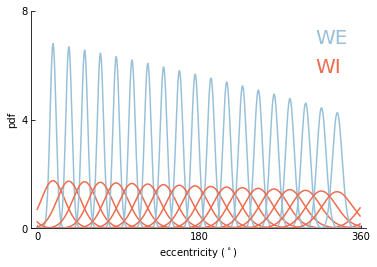

In [10]:
N=512

v_E=zeros((N));
v_I=zeros((N));
WE=zeros((N,N));
WI=zeros((N,N));

theta = [float(range(0,N)[i])/N*2*pi for i in range(0,N)] 
###
kappas_e_range= np.linspace(100, 300, N) ##100-300 ok
kappas_e_range = np.flip(kappas_e_range)
###
kappas_i_range = np.linspace(11, 20, N) #15-20 ok
kappas_i_range = np.flip(kappas_i_range)
###
for i in range(0, N):
    v_E_new=[e**(kappas_e_range[i]*cos(theta[f]))/(2*pi*scipy.special.i0(kappas_e_range[i])) for f in range(0, len(theta))]    
    v_I_new=[e**(kappas_i_range[i]*cos(theta[f]))/(2*pi*scipy.special.i0(kappas_i_range[i])) for f in range(0, len(theta))]
    ###    
    vE_NEW=roll(v_E_new,i)
    vI_NEW=roll(v_I_new,i) #to roll
    ###    
    WE[:,i]=vE_NEW
    WI[:,i]=vI_NEW

    
####
plt.figure()
p_cols=['#98c1d9', '#ee6c4d' ]
for con_w in [25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 350, 375, 400, 425, 450]:
    plt.plot(WE[con_w, :], p_cols[0])
    plt.plot(WI[con_w, :], p_cols[1])
plt.xlabel('eccentricity ($^\circ$)')
plt.ylabel('pdf')
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.plot(WE[475, :], p_cols[0], label='WE')
plt.plot(WI[475, :], p_cols[1], label='WI')
plt.ylim(0,8)
plt.yticks([0,4,8])
plt.xlim(-10, 520)
plt.xticks([0, int(512/2), 512], ['0', '180', '360'])
l = plt.legend(loc=1, frameon=False, prop={'size': 20})
for i_h, h_idx in enumerate(['WE', 'WI']):
    l.get_texts()[i_h].set_text(h_idx)
    l.legendHandles[i_h].set_visible(False);
    l.get_texts()[i_h].set_color(p_cols[i_h]);
#
plt.show(block=False)

In [ ]:
v_E=zeros(1,N);
v_I=zeros(1,N);
WE=zeros(N,N);
WI=zeros(N,N);

for j=1:N %para cada distancia hay una sigma diferente
    for i=1:N %dentro de cada distancia se calcula la conectividad con el resto teniendo en cuenta una j concreta (una sigma especifica)
        v_E(i)=1/(sqrt(2*pi)*sigmas_E(j))*exp(-((n_inicial(j)-n_inicial(i))^2)/(2*sigmas_E(j))^2);
        v_I(i)=1/(sqrt(2*pi)*sigmas_I(j))*exp(-((n_inicial(j)-n_inicial(i))^2)/(2*sigmas_I(j))^2);
    end
  WE(:,j)=v_E;
  WI(:,j)=v_I;
end